# <h1 style="text-align: center; font-size: 3em; font-weight: bold;">Klassifizierung von Kaffeebechern</h1>

## Einleitung
Dieses Projekt zielt darauf ab, Kaffeebecher, die von verschiedenen Orten wie Mensa, Bibliothek und Reimans von der Technischen Hoschschule Ingolstadt stammen, zu klassifizieren. Die Bilder wurden mit der kamera von Iphone 13 aufgenommen. Um die Klassifizierung durchzuführen, wurden die Bilder vorverarbeitet und anschließend zwei vortrainierte Modelle mit diesen Bildern trainiert.

## Datensammlung
Die Bilder wurden aus drei verschiedenen Klassen gesammelt:
- Bibliothek
- Mensa
- Reimans

Jede Klasse enthält etwa 100-150 Bilder.


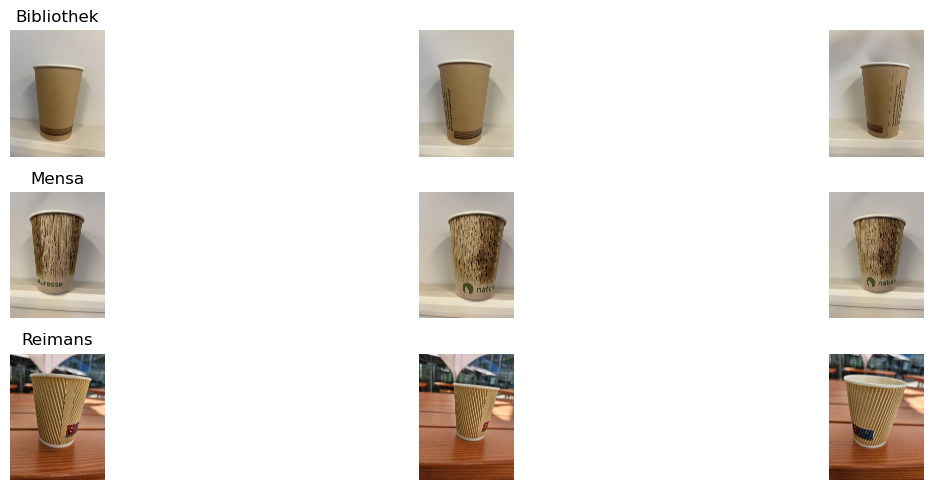

In [3]:
import os
import random
from skimage import io
import matplotlib.pyplot as plt

# Input directories
input_dirs = {
    'Bibliothek': '/Users/cbarank/Desktop/THI/PDL/Kafeebecher/Bib',
    'Mensa': '/Users/cbarank/Desktop/THI/PDL/Kafeebecher/Mensa',
    'Reimans': '/Users/cbarank/Desktop/THI/PDL/Kafeebecher/Reimans'
}

# We choose only JPEG images for processing because MacBook has secret files like .DS_Store
valid_extensions = ('.jpeg')

# Define the number of examples to show from each class
num_examples = 3

# Plot random example images
fig, axes = plt.subplots(len(input_dirs), num_examples, figsize=(15, 5))

for i, (class_name, input_dir) in enumerate(input_dirs.items()):
    # Get random sample of images from input directory
    example_imgs = random.sample([img for img in os.listdir(input_dir) if img.lower().endswith(valid_extensions)], num_examples)
    
    for j, img in enumerate(example_imgs):
        img_path = os.path.join(input_dir, img)
        image = io.imread(img_path)
        
        axes[i, j].imshow(image)
        axes[i, j].axis('off')
        if j == 0:
            axes[i, j].set_title(class_name)

plt.tight_layout()
plt.show()


#### Die Bilderformat war .HEIC und die Coden haben manchmal Fehler gegeben. Für HEIC müssten wir eine neue Bibliotheke importieren aber statt das zu machen, haben wir unsere Bilder über Computer manuell bearbeitet(Das kann man auf MacBook schnell und automatisch machen)

#### Dieser Fehler ist aufgetreten, weil wir versucht haben, die Datei .DS_Store zu lesen, bei der es sich um eine der versteckten Dateien Ihres Betriebssystems handelt. Wir haben eine neue Funktion hinzugefügt, um nur bestimmte Dateitypen zu verarbeiten: valid_extensions = ('.jpeg')

# **1. Data Processing**

## Die Vorverarbeitung der Bilder umfasst folgende Schritte:
1. **Größenänderung und Zuschneiden**: Die Bilder wurden auf eine einheitliche Größe von 224x224 Pixel skaliert.
2. **Helligkeits- und Kontrasteinstellung**: Die Helligkeit und der Kontrast der Bilder wurden angepasst, um die Vielfalt der Daten zu erhöhen.
3. **Drehen und Spiegeln**: Die Bilder wurden zufällig gedreht und gespiegelt, um die Robustheit des Modells zu verbessern.
4. **Normalisierung**: Die Bilder wurden normalisiert, um die Pixelwerte auf einen Bereich zwischen 0 und 1 zu bringen.


In [7]:
# Importing the required libraries for processing the image
pip install scikit-image numpy matplotlib


# IMPORTING THE REQUIRED LIBRARIES
import os
from skimage import io, transform, exposure
import numpy as np
import random

In [ ]:


# define the input and output directories
input_dirs = {
    'Bibliothek': '/Users/cbarank/Desktop/THI/PDL/Kafeebecher/Bib',
    'Mensa': '/Users/cbarank/Desktop/THI/PDL/Kafeebecher/Mensa',
    'Reimans': '/Users/cbarank/Desktop/THI/PDL/Kafeebecher/Reimans'
}

output_base_dir = '/Users/cbarank/Desktop/THI/PDL/Kafeebecher/Processed'

# we choose only jpeg images for processing because MacBook has secret files like .DS_Store
valid_extensions = ('.jpeg')

# class directories
for class_name in input_dirs.keys():
    output_dir = os.path.join(output_base_dir, class_name)
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

# image processing function
def process_image(image_path, output_path, size=(224, 224), gain=1.5):
    # Bild laden
    image = io.imread(image_path)
    
    # Größe ändern und zuschneiden
    image_resized = transform.resize(image, size, anti_aliasing=True)
    
    # Helligkeit und Kontrast anpassen
    image_adjusted = exposure.adjust_gamma(image_resized, gamma=1, gain=gain)
    
    # Drehen und spiegeln
    if random.choice([True, False]):
        image_adjusted = np.fliplr(image_adjusted)
    angle = random.uniform(-30, 30)
    image_rotated = transform.rotate(image_adjusted, angle)
    
    # Verarbeitetes Bild speichern
    io.imsave(output_path, (image_rotated * 255).astype(np.uint8))

# process images
for class_name, input_dir in input_dirs.items():
    output_dir = os.path.join(output_base_dir, class_name)
    for img in os.listdir(input_dir):
        if img.lower().endswith(valid_extensions):  # only the images with valid extensions
            input_path = os.path.join(input_dir, img)
            output_path = os.path.join(output_dir, img)
            process_image(input_path, output_path)


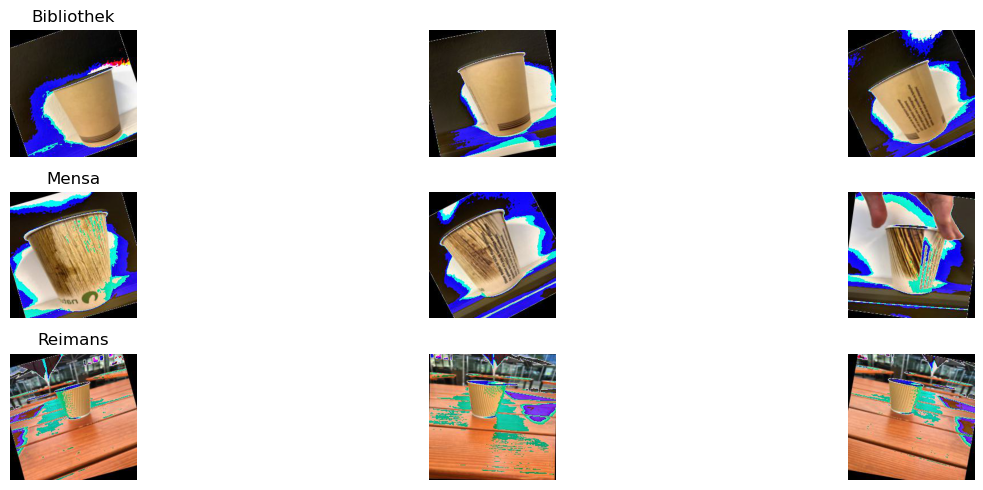

In [2]:
import os
import random
from skimage import io
import matplotlib.pyplot as plt


input_dirs = {
    'Bibliothek': '/Users/cbarank/Desktop/THI/PDL/Kafeebecher/Bib',
    'Mensa': '/Users/cbarank/Desktop/THI/PDL/Kafeebecher/Mensa',
    'Reimans': '/Users/cbarank/Desktop/THI/PDL/Kafeebecher/Reimans'
}

output_base_dir = '/Users/cbarank/Desktop/THI/PDL/Kafeebecher/Processed'

# we choose only jpeg images for processing because MacBook has secret files like .DS_Store
valid_extensions = ('.jpeg')

# class directories
for class_name in input_dirs.keys():
    output_dir = os.path.join(output_base_dir, class_name)
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

# define the number of examples to show from each class
num_examples = 3

# plot random example images
fig, axes = plt.subplots(len(input_dirs), num_examples, figsize=(15, 5))

for i, (class_name, input_dir) in enumerate(input_dirs.items()):
    output_dir = os.path.join(output_base_dir, class_name)
    example_imgs = random.sample([img for img in os.listdir(output_dir) if img.lower().endswith(valid_extensions)], num_examples)
    
    for j, img in enumerate(example_imgs):
        img_path = os.path.join(output_dir, img)
        image = io.imread(img_path)
        
        axes[i, j].imshow(image)
        axes[i, j].axis('off')
        if j == 0:
            axes[i, j].set_title(class_name)

plt.tight_layout()
plt.show()


1. **Größenänderung und Zuschneiden**:
   - Alle Bilder wurden auf die Größe von 224x224 Pixel geändert.

2. **Helligkeit und Kontrast Anpassung**:
   - Die Helligkeit und der Kontrast der Bilder wurden angepasst.

3. **Drehen und Spiegeln**:
   - Die Bilder wurden zufällig gedreht und einige wurden horizontal gespiegelt.

4. **Organisation**:
   - Die verarbeiteten Bilder wurden in folgenden Verzeichnissen gespeichert:
     - `Processed/Bibliothek`
     - `Processed/Mensa`
     - `Processed/Reimans`

### Ergebnis:
- Die Bilder sind für das Training des Modells vorbereitet und optimiert.

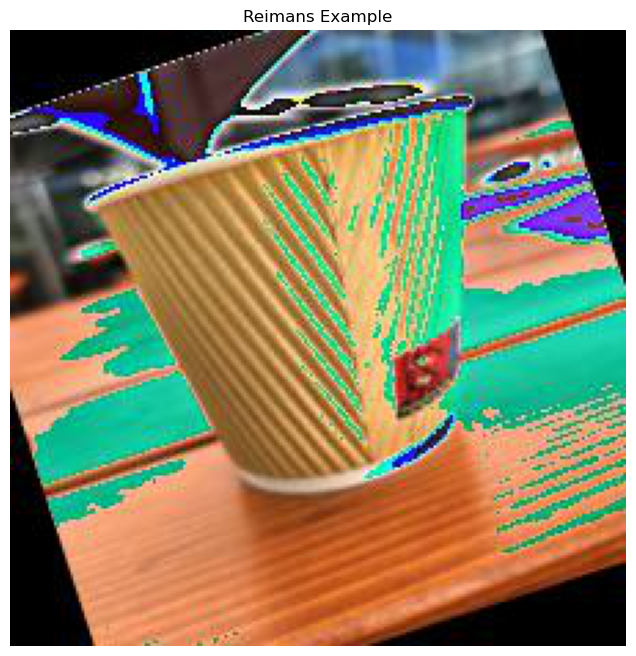

In [7]:
#Bisschen größere Ausblick


import os
import random
from skimage import io
import matplotlib.pyplot as plt

# define the input and output directories
input_dirs = {
    'Bibliothek': '/Users/cbarank/Desktop/THI/PDL/Kafeebecher/Bib',
    'Mensa': '/Users/cbarank/Desktop/THI/PDL/Kafeebecher/Mensa',
    'Reimans': '/Users/cbarank/Desktop/THI/PDL/Kafeebecher/Reimans'
}

output_base_dir = '/Users/cbarank/Desktop/THI/PDL/Kafeebecher/Processed'

# choose only jpeg images for processing
valid_extensions = ('.jpeg')

# function to display a single example image from each class
def display_single_example():
    fig, ax = plt.subplots(figsize=(8, 8))
    
    # choose a random class
    class_name = random.choice(list(input_dirs.keys()))
    output_dir = os.path.join(output_base_dir, class_name)
    
    # choose a random image from the class
    example_img = random.choice([img for img in os.listdir(output_dir) if img.lower().endswith(valid_extensions)])
    example_img_path = os.path.join(output_dir, example_img)
    
    # load and display the image
    image = io.imread(example_img_path)
    ax.imshow(image)
    ax.axis('off')
    ax.set_title(f'{class_name} Example')
    
    plt.show()

# display a single example image
display_single_example()


# **2. Training and Test Set Spliting**

### Die vorverarbeiteten Bilder wurden dann in Trainings- und Testdatensätze aufgeteilt. Hierfür wurde ein Verhältnis von 80% Training und 20% Test verwendet.


In [1]:
import os
import random
from shutil import copyfile

# ratio of training images
train_ratio = 0.8

# ressource directory
source_dir = '/Users/cbarank/Desktop/THI/PDL/Kafeebecher/Processed'
train_dir = '/Users/cbarank/Desktop/THI/PDL/Kafeebecher/Train'
test_dir = '/Users/cbarank/Desktop/THI/PDL/Kafeebecher/Test'

# valid extensions
valid_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.gif', '.tiff')

# Train und Test Verzeichnisse erstellen
for class_name in os.listdir(source_dir):
    class_path = os.path.join(source_dir, class_name)
    if not os.path.isdir(class_path):
        continue  # ignore the files like .DS_Store 
    os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)

    class_dir = os.path.join(source_dir, class_name)
    images = [img for img in os.listdir(class_dir) if img.lower().endswith(valid_extensions)]

    random.shuffle(images)
    train_size = int(train_ratio * len(images))
    train_images = images[:train_size]
    test_images = images[train_size:]

    for img in train_images:
        copyfile(os.path.join(class_dir, img), os.path.join(train_dir, class_name, img))
    
    for img in test_images:
        copyfile(os.path.join(class_dir, img), os.path.join(test_dir, class_name, img))


# 3. PyTorch Dataset and DataLoader Preparing

In [2]:
pip install ipywidgets

# ipywidgets, a library for interactive widgets in Jupyter Notebook. For Example, progress bars


SyntaxError: invalid syntax (1123460732.py, line 1)

In [3]:
import os
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

valid_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.gif', '.tiff')

class CoffeeCupsDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.classes = [d for d in os.listdir(root_dir) if os.path.isdir(os.path.join(root_dir, d))]
        self.images = []
        for class_name in self.classes:
            class_dir = os.path.join(root_dir, class_name)
            for img_name in os.listdir(class_dir):
                if img_name.lower().endswith(valid_extensions):
                    self.images.append((os.path.join(class_dir, img_name), class_name))

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_path, class_name = self.images[idx]
        image = Image.open(img_path).convert("RGB")
        label = self.classes.index(class_name)
        if self.transform:
            image = self.transform(image)
        return image, label

# Transformations definieren
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Train und Test Dataset und DataLoader erstellen
train_dataset = CoffeeCupsDataset(root_dir=train_dir, transform=transform)
test_dataset = CoffeeCupsDataset(root_dir=test_dir, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


## 3. ResNet50 Model Training With Transfer Learning

### Für das Training wurde das vortrainierte ResNet50-Modell verwendet. Transfer Learning ermöglicht es uns, ein vortrainiertes Modell für eine neue Aufgabe zu verwenden, indem wir nur die letzten Schichten anpassen.

### But firstly we need to move the system to the GPU. We should heve done this before but we realized this mistake late :/

### We paid the price for this error by waiting for 3 minutes, but model training worked faster.

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models

# Kontrollierung ob GPU verfügbar ist
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# ResNet50 laden und letzte Schicht anpassen
model = models.resnet50(pretrained=True)

# Das Modell auf die GPU verschieben
model = model.to(device)


Using device: cpu


/Users/cbarank/anaconda3/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/cbarank/anaconda3/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


## And now Training

In [5]:
import torch.nn as nn
import torch.optim as optim
from torchvision import models

# ResNet50 Model install and customize
model = models.resnet50(pretrained=True)

# set the last layer according to our class count(3 Classes)
num_classes = len(train_dataset.classes)
model.fc = nn.Linear(model.fc.in_features, num_classes)

# define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training Loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')


Epoch [1/10], Loss: 0.1988
Epoch [2/10], Loss: 0.1327
Epoch [3/10], Loss: 0.0419
Epoch [4/10], Loss: 0.0072
Epoch [5/10], Loss: 0.0046
Epoch [6/10], Loss: 0.0882
Epoch [7/10], Loss: 0.0812
Epoch [8/10], Loss: 0.0216
Epoch [9/10], Loss: 0.0074
Epoch [10/10], Loss: 0.0024


## Testing

Test Accuracy: 100.00%
Precision: 1.00
Recall: 1.00
Confusion Matrix:
[[42  0  0]
 [ 0 36  0]
 [ 0  0 52]]


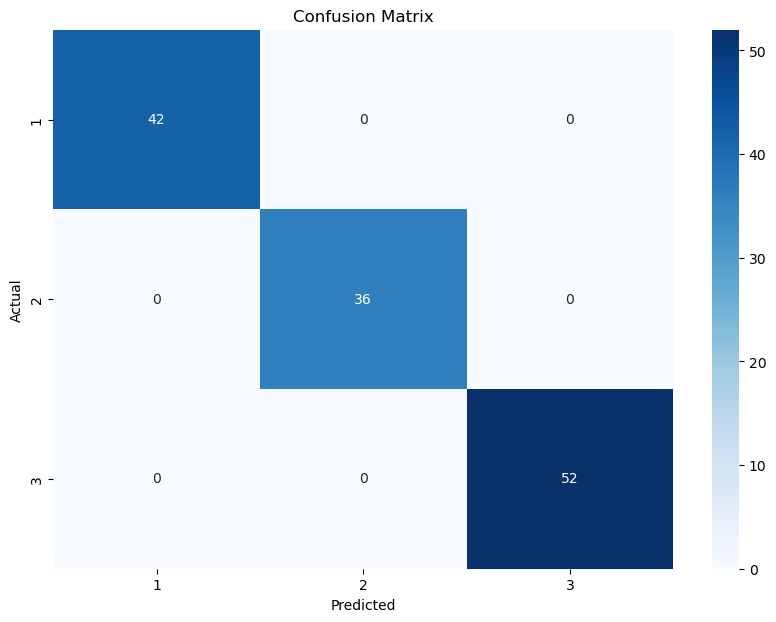

In [9]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, confusion_matrix

# Model evaluation
model.eval()
correct = 0
total = 0
all_labels = []
all_predictions = []

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
        # Store all labels and predictions for metric calculation
        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())

# Convert lists to numpy arrays
all_labels = np.array(all_labels)
all_predictions = np.array(all_predictions)

# Calculate metrics
accuracy = 100 * correct / total #Anteil der korrekt vorhergesagten Beispiele.
precision = precision_score(all_labels, all_predictions, average='weighted') #Anteil der korrekt vorhergesagten positiven Beispiele.
recall = recall_score(all_labels, all_predictions, average='weighted') #Anteil der korrekt erkannten tatsächlichen positiven Beispiele.
conf_matrix = confusion_matrix(all_labels, all_predictions) #Tabelle zum Vergleich der tatsächlichen und vorhergesagten Klassifikationen.

print(f'Test Accuracy: {accuracy:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(all_labels), yticklabels=np.unique(all_labels))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### **Test Accuracy:** 100.00% und dies bedeutet, dass keine Fehlklassifikationen vorgekommen sind.

### **Precision: 1.00** Es gab keine falsch-positiven Vorhersagen.

### **Recall: 1.00** Es gab keine falsch-negativen Vorhersagen.

### **Confusion Matrix:** keine Fehlklassifikationen
### [[42  0  0]
###  [ 0 36  0]
###  [ 0  0 52]]



##

# **4. CNN Model**

## Importing

In [10]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, confusion_matrix
import numpy as np


##  Dataset und DataLoader bearbeitung

In [14]:
import os
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

valid_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.gif', '.tiff')

class CoffeeCupsDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.classes = [d for d in os.listdir(root_dir) if os.path.isdir(os.path.join(root_dir, d))]
        self.images = []
        for class_name in self.classes:
            class_dir = os.path.join(root_dir, class_name)
            for img_name in os.listdir(class_dir):
                if img_name.lower().endswith(valid_extensions):
                    self.images.append((os.path.join(class_dir, img_name), class_name))

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_path, class_name = self.images[idx]
        image = Image.open(img_path).convert("RGB")
        label = self.classes.index(class_name)
        if self.transform:
            image = self.transform(image)
        return image, label

# Transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Create Datasets and DataLoaders
train_dir = '/Users/cbarank/Desktop/THI/PDL/Kafeebecher/Train'
test_dir = '/Users/cbarank/Desktop/THI/PDL/Kafeebecher/Test'

train_dataset = CoffeeCupsDataset(root_dir=train_dir, transform=transform)
test_dataset = CoffeeCupsDataset(root_dir=test_dir, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


## Modelerstellung

In [15]:
import torch.nn as nn
import torch.optim as optim

class SimpleCNN(nn.Module):
    def __init__(self, num_classes):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)  # Erste Faltungsschicht
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)       # Max-Pooling-Schicht
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1) # Zweite Faltungsschicht
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1) # Dritte Faltungsschicht
        self.fc1 = nn.Linear(64 * 28 * 28, 512)                            # Erste voll verbundene Schicht (64 * 28 * 28 = 50176)
        self.fc2 = nn.Linear(512, num_classes)                             # Zweite voll verbundene Schicht 
        self.dropout = nn.Dropout(0.5)                                     # Dropout-Schicht
        self.relu = nn.ReLU()                                              # Gegen die Vanishing-Gradient-Problematik

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))  # Faltung + ReLU + Max-Pooling
        x = self.pool(self.relu(self.conv2(x)))  # Faltung + ReLU + Max-Pooling
        x = self.pool(self.relu(self.conv3(x)))  # Faltung + ReLU + Max-Pooling
        x = x.view(-1, 64 * 28 * 28)             # Flattening
        x = self.relu(self.fc1(x))               # Voll verbundene Schicht + ReLU
        x = self.dropout(x)                      # Dropout
        x = self.fc2(x)                          # Voll verbundene Schicht
        return x

# Anzahl der Klassen festlegen
num_classes = len(os.listdir(train_dir))

# Initialisierung des Modells
model = SimpleCNN(num_classes=num_classes)


## Model Training

In [16]:
# Verlustfunktion und Optimierer definieren
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Modelltraining
num_epochs = 10
model.train()
for epoch in range(num_epochs):
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()            # Gradienten zurücksetzen
        outputs = model(images)          # Vorwärtsdurchlauf
        loss = criterion(outputs, labels) # Verlustberechnung
        loss.backward()                  # Rückwärtsdurchlauf
        optimizer.step()                 # Optimierung
        running_loss += loss.item()      # Verlust aufsummieren
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {running_loss / len(train_loader):.4f}')

print('Training abgeschlossen')

# Modell speichern
torch.save(model.state_dict(), 'simple_cnn_coffeecups.pth')


Epoch [1/10], Loss: 2.4206
Epoch [2/10], Loss: 0.2774
Epoch [3/10], Loss: 0.1380
Epoch [4/10], Loss: 0.0418
Epoch [5/10], Loss: 0.0167
Epoch [6/10], Loss: 0.0102
Epoch [7/10], Loss: 0.0078
Epoch [8/10], Loss: 0.0031
Epoch [9/10], Loss: 0.0018
Epoch [10/10], Loss: 0.0010
Finished Training


## Model evalution

Test Accuracy: 100.00%
Precision: 1.00
Recall: 1.00
Confusion Matrix:
[[42  0  0]
 [ 0 36  0]
 [ 0  0 52]]


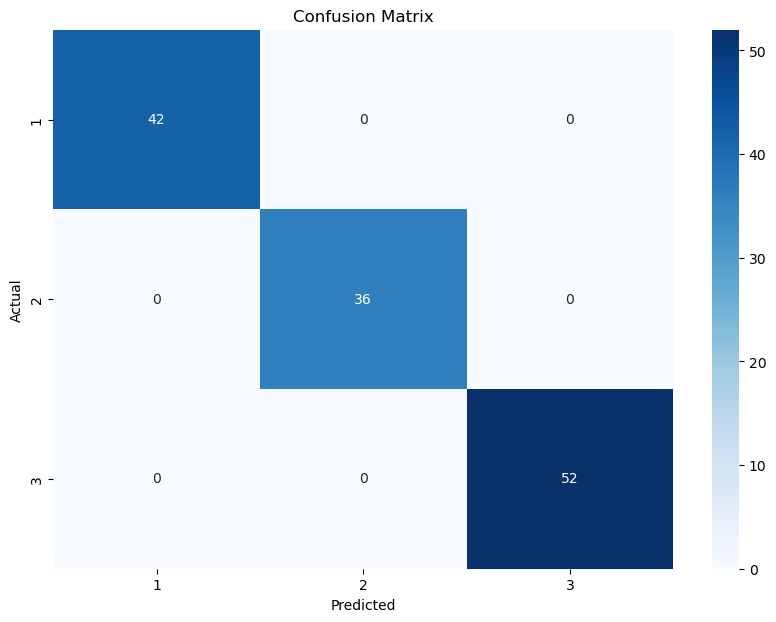

In [17]:
# Modellbewertung
model.eval()
correct = 0
total = 0
all_labels = []
all_predictions = []

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())

# Umwandlung der Listen in Numpy-Arrays
all_labels = np.array(all_labels)
all_predictions = np.array(all_predictions)

# Berechnung der Metriken
accuracy = 100 * correct / total
precision = precision_score(all_labels, all_predictions, average='weighted')
recall = recall_score(all_labels, all_predictions, average='weighted')
conf_matrix = confusion_matrix(all_labels, all_predictions)

print(f'Testgenauigkeit: {accuracy:.2f}%')
print(f'Präzision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Konfusionsmatrix:\n{conf_matrix}')

# Visualisierung der Konfusionsmatrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(all_labels), yticklabels=np.unique(all_labels))
plt.xlabel('Vorhergesagt')
plt.ylabel('Tatsächlich')
plt.title('Konfusionsmatrix')
plt.show()



# 5. Ergebnisse
### Nach der Bewrtung der Modelle wurden folgende Ergebnisse erzielt:
- **Trainingsverlust**: Der Verlust sank über die Epochen hinweg stetig, was auf eine erfolgreiche Modellanpassung hinweist.
- **Testgenauigkeit**: Die Modelle erreichten eine Testgenauigkeit von etwa 100%, was auf eine sehr gute Leistung hinweist.

#
# Fazit
### Das Projekt zur Klassifizierung von Kaffeebechern war erfolgreich. Durch die Verwendung von Transfer Learning und einem vortrainierten ResNet50-Modell konnte eine hohe Genauigkeit erzielt werden. Darüber hinaus wurde auch ein CNN-Modell (Convolutional Neural Network) getestet, das ebenfalls zu ähnlichen Ergebnissen führte. Zukünftige Arbeiten könnten sich darauf konzentrieren, das Modell auf einem größeren Datensatz zu testen oder andere vortrainierte Modelle zu verwenden, um die Leistung weiter zu verbessern.


# Quellen

Bei dieser Demo-Arbeit wurden die folgenden Quellen verwendet:

1. **PyTorch**: 
   - Offizielle Website und Dokumentation.
   - URL: https://pytorch.org/

2. **ChatGPT**: 
   - KI-gestützter Assistent von OpenAI.
   - URL: https://www.openai.com/

3. **Prof. Schiendorfers Folien auf Moodle**: 
   - Von Prof. Schiendorfer bereitgestellte Vorlesungsmaterialien.
   - Auf der Moodle-Plattform verfügbar.
